In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'chest-x-ray-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4610581%2F7859946%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240412%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240412T075524Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8d31b53b284cad902a9b3cabf8a81159cf9130a5f02c5107f33e0d59ed39b5b62bbd23a4fcd1936ca91d67a0c56fb3c08e4ebd0e90d4f0986fa16fb282ea06cb850da1ca0724e44f564960f6243566d63d67024d62493cf30c2f2f74a98ddf8ffdacfd1f2b2a1380d34b3b025126cf581ecb48e654f76932be2eb65aa3a1498b483953e1870a050d1f2f5687c848f3439d3e75c1a396acc32adf7c671ac6dd04c628e93b5bc767d368bfce4174b2f2ece5674144e39f722a186720f9009a2bdfb0beddba509eb4821ab2a4f82be82bd9b072fec380e42cd083f65ac71d50f528ae4ff36acedfa123b30476c1871d4e896566ce1ecd0801d55cb1ff90909b83db,resnet18-model:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4628445%2F7884876%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240412%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240412T075524Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dd71f24f29ac770b7e5fbad9d42ef0a80c16f38aa0830cd75d64a39cc74c172c685c384f889a984313130f52f9078b59bbe8b2174599e0b7f0ff6722c661b5ad4302592b5db6561bfc4b8a578634d4a5daf71cf3505c1f17e8cff1aef74a5271fb19f6af71414f6c479d05817a55d437597741200e78913370cedad5edfb110668cd3030ca7a06d8331590eede84bc0ff3391e637aa0308ed824d5ace21d8369e5bd682bd17534aef505679e43f3645e0c175119ca9ee6429eade9484995a23a2f46d02b748f1d1df29d9fa9ce96f216ce220d28fd00dc8ab00f8fb080ce82be2019d6b8a51c79c708a6552d8eb6fce2491c2c83e9caa6ef7a5922e212df08b91'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 765806673 bytes downloaded
Downloaded and uncompressed: chest-x-ray-images
[==================================================] 43451679 bytes downloaded
Downloaded and uncompressed: resnet18-model
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-x-ray-images/CXR Images/covid190026.png
/kaggle/input/chest-x-ray-images/CXR Images/EUNTcLTXYAEzvUG.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900388.png
/kaggle/input/chest-x-ray-images/CXR Images/EUR2DcOXgAEg1Xt.jfif
/kaggle/input/chest-x-ray-images/CXR Images/EUNWpWGWoAMgXxO.jfif
/kaggle/input/chest-x-ray-images/CXR Images/covid1900348.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900507.png
/kaggle/input/chest-x-ray-images/CXR Images/covid1900598.png
/kaggle/input/chest-x-ray-images/CXR Images/covid190030.png
/kaggle/input/chest-x-ray-images/CXR Images/065.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/COVID-00032.jpg
/kaggle/input/chest-x-ray-images/CXR Images/covid1900167.png
/kaggle/input/chest-x-ray-images/CXR Images/covid-19-pneumonia-67.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/CASE56_XRAY_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/case38_Xray_1.jpeg
/kaggle/input/chest-x-ray-images/CXR Images/auntminnie-2020_01_31_20_2

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
covid_directory = f'/kaggle/input/chest-x-ray-images/CXR Images'
normal_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Normal'
pneumonia_directory = f'/kaggle/input/chest-x-ray-images/CXR Images Pneumonia'

image_size = (224, 224)

def load_images(directory):
    class_images = []
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        resized_image = cv2.resize(image, image_size)
        resized_image = resized_image.astype(np.float32)
        normalized_image = resized_image / 255.0
        class_images.append(normalized_image)

    return np.array(class_images)

covid_images = load_images(covid_directory)
normal_images = load_images(normal_directory)
pneumonia_images = load_images(pneumonia_directory)

print(covid_images.shape)
print(normal_images.shape)
print(pneumonia_images.shape)

(673, 224, 224, 3)
(758, 224, 224, 3)
(709, 224, 224, 3)


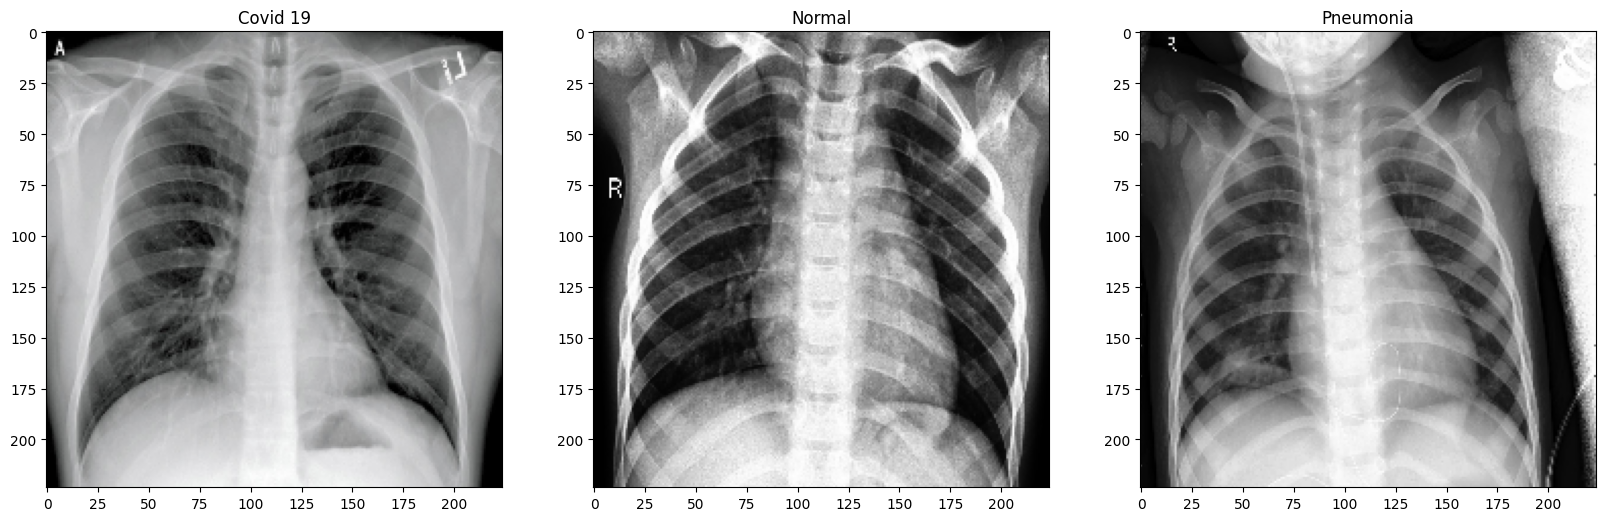

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize = (20,20))
ax[0].imshow(covid_images[0])
ax[0].title.set_text("Covid 19")
ax[1].imshow(normal_images[0])
ax[1].title.set_text("Normal")
ax[2].imshow(pneumonia_images[0])
ax[2].title.set_text("Pneumonia")

In [ ]:
all_images = np.concatenate((covid_images, normal_images, pneumonia_images), axis=0)
print(all_images.shape)
covid_labels = np.zeros(len(covid_images), dtype=np.int32)
pneumonia_labels = np.ones(len(pneumonia_images), dtype=np.int32)
normal_labels = np.full(len(normal_images), 2, dtype=np.int32)

all_labels = np.concatenate((covid_labels, normal_labels, pneumonia_labels), axis=0)
print(all_labels.shape)

(2140, 224, 224, 3)
(2140,)


In [ ]:
train_val_split, test_split = 0.6, 0.4
X_train_val, X_test, y_train_val, y_test = train_test_split(all_images, all_labels, train_size = train_val_split, test_size = test_split, random_state=42, stratify=all_labels)
train_split, val_split = 0.9, 0.1
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=train_split, test_size=val_split, random_state=42, stratify=y_train_val)

import torch
from torch import nn
from torchvision import models

def create_model():
    model = models.resnet34(weights='DEFAULT')
    for parameter in model.parameters():
        parameter.requires_grad = True

    input_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=0.6),
        nn.Linear(input_features, 3),
        nn.Softmax(dim=1)
    )

    return model

model = create_model()







Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 122MB/s]


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

num_epochs = 5
batch_size= 64


X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_val = torch.tensor(X_val)
y_val = torch.tensor(y_val)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

X_train = X_train.to(device)
y_train = y_train.to(device)
X_val = X_val.to(device)
y_val = y_val.to(device)

def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
validation_dataset = torch.utils.data.TensorDataset(X_val, y_val)

train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_data_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)


train_acc_list = []

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    total_accuracy = 0.0
    for i, (images, labels) in enumerate(train_data_loader):
        images = images.to(device)
        labels = labels.to(device)
        images = images.permute(0, 3, 1, 2)
        optimizer.zero_grad()
        labels = labels.long()
        outputs = model(images)
        num_classes = 3
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes)
        proper_labels = torch.argmax(one_hot_labels, dim=1)
        loss = criterion(outputs, proper_labels)
        loss.backward()
        optimizer.step()


        total_loss += loss.item()


        accuracy = calculate_accuracy(outputs, proper_labels)
        total_accuracy += accuracy

        if (i + 1) % 10 == 0 or i + 1 == len(train_data_loader):
            avg_loss = total_loss / (i + 1)
            avg_accuracy = total_accuracy / (i + 1)


            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_data_loader)}], "
                  f"Loss: {avg_loss:.4f}, Accuracy: {avg_accuracy:.4f}")


    avg_epoch_loss = total_loss / len(train_data_loader)
    avg_epoch_accuracy = (100 * total_accuracy) / len(train_data_loader)
    train_acc_list.append(avg_epoch_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_epoch_loss:.4f}, "
          f"Average Accuracy: {avg_epoch_accuracy:.4f}")

print("Training complete")




Epoch [1/5], Step [10/19], Loss: 0.7458, Accuracy: 0.7875
Epoch [1/5], Step [19/19], Loss: 0.7051, Accuracy: 0.8353
Epoch [1/5], Average Loss: 0.7051, Average Accuracy: 83.5252
Epoch [2/5], Step [10/19], Loss: 0.6468, Accuracy: 0.9094
Epoch [2/5], Step [19/19], Loss: 0.6399, Accuracy: 0.9137
Epoch [2/5], Average Loss: 0.6399, Average Accuracy: 91.3651
Epoch [3/5], Step [10/19], Loss: 0.6238, Accuracy: 0.9281
Epoch [3/5], Step [19/19], Loss: 0.6258, Accuracy: 0.9260
Epoch [3/5], Average Loss: 0.6258, Average Accuracy: 92.5987
Epoch [4/5], Step [10/19], Loss: 0.6139, Accuracy: 0.9344
Epoch [4/5], Step [19/19], Loss: 0.6055, Accuracy: 0.9441
Epoch [4/5], Average Loss: 0.6055, Average Accuracy: 94.4079
Epoch [5/5], Step [10/19], Loss: 0.5969, Accuracy: 0.9594
Epoch [5/5], Step [19/19], Loss: 0.6081, Accuracy: 0.9446
Epoch [5/5], Average Loss: 0.6081, Average Accuracy: 94.4627
Training complete


In [ ]:
val_accuracy_list = []
model.eval()
with torch.no_grad():
  val_loss = 0.0
  val_correct = 0
  total_samples = 0
  for epoch in range(0, num_epochs):
    for i, (images, labels) in enumerate(validation_data_loader):
      images.to(device)
      labels.to(device)
      images = images.permute(0,3,1,2)
      labels = labels.long()
      outputs = model(images)
      val_loss += criterion(outputs, labels).item() * images.size(0)
      _, predicted = torch.max(outputs.data, 1)
      val_correct += (predicted == labels).sum().item()
      total_samples += labels.shape[0]

    val_accuracy = 100.0 * val_correct / total_samples
    avg_loss = val_loss / total_samples
    val_accuracy_list.append(val_accuracy)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

Epoch [1/5], Validation Loss: 0.6465, Validation Accuracy: 90.70%
Epoch [2/5], Validation Loss: 0.6465, Validation Accuracy: 90.70%
Epoch [3/5], Validation Loss: 0.6465, Validation Accuracy: 90.70%
Epoch [4/5], Validation Loss: 0.6465, Validation Accuracy: 90.70%
Epoch [5/5], Validation Loss: 0.6465, Validation Accuracy: 90.70%


[83.5252192982456, 91.36513157894737, 92.59868421052632, 94.40789473684211, 94.46271929824562]
[90.69767441860465, 90.69767441860465, 90.69767441860465, 90.69767441860465, 90.69767441860465]


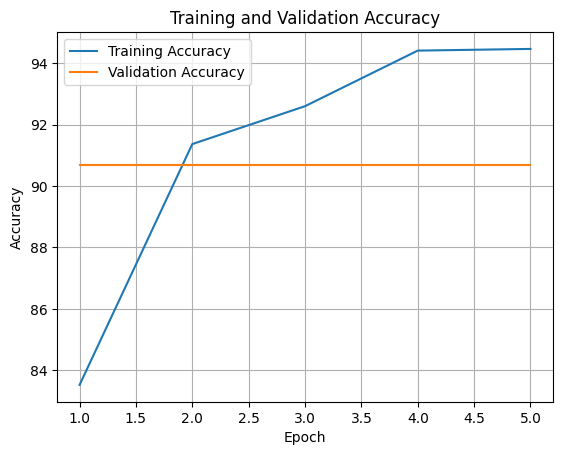

In [ ]:
print(train_acc_list)
print(val_accuracy_list)
plt.plot(range(1, len(train_acc_list) + 1), train_acc_list, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy_list) + 1), val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)
X_test = X_test.to(device)
y_test = y_test.to(device)

test_data_loader = DataLoader(torch.utils.data.TensorDataset(X_test, y_test), batch_size=batch_size, shuffle=False)

model.eval()
with torch.no_grad():
  test_loss = 0.0
  test_correct = 0
  total_samples = 0
  predicted_labels = []
  true_labels = []
  for i, (images, labels) in enumerate(test_data_loader):
    images = images.permute(0,3,1,2)
    labels = labels.long()
    outputs = model(images)
    test_loss += criterion(outputs, labels).item() * images.size(0)
    _, predicted = torch.max(outputs.data, 1)
    test_correct += (predicted == labels).sum().item()
    total_samples += labels.shape[0]

    predicted_labels.extend(predicted.cpu().tolist())
    true_labels.extend(labels.cpu().tolist())

  test_accuracy = 100.0 * test_correct / total_samples
  test_loss = test_loss / total_samples

  from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

  accuracy = accuracy_score(true_labels, predicted_labels)
  precision = precision_score(true_labels, predicted_labels, average='macro')
  recall = recall_score(true_labels, predicted_labels, average='macro')
  f1 = f1_score(true_labels, predicted_labels, average='macro')

  print(f"Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.2f}%")
  print(f"Accuracy Score: {accuracy:.4f}")
  print(f"Macro Precision: {precision:.4f}")
  print(f"Macro Recall: {recall:.4f}")
  print(f"Macro F1-Score: {f1:.4f}")

Testing Loss: 0.6728, Testing Accuracy: 88.32%
Accuracy Score: 0.8832
Macro Precision: 0.8985
Macro Recall: 0.8888
Macro F1-Score: 0.8839


Micro Precision: 0.8832
Micro Recall: 0.8832
Micro F1-Score: 0.8832


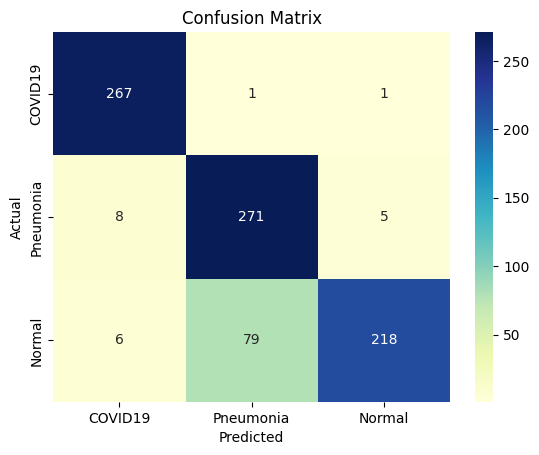

In [ ]:
micro_precision = precision_score(true_labels, predicted_labels, average='micro')
micro_recall = recall_score(true_labels, predicted_labels, average='micro')
micro_f1 = f1_score(true_labels, predicted_labels, average='micro')

print(f"Micro Precision: {micro_precision:.4f}")
print(f"Micro Recall: {micro_recall:.4f}")
print(f"Micro F1-Score: {micro_f1:.4f}")

from sklearn.metrics import confusion_matrix
class_labels = ['COVID19', 'Pneumonia', 'Normal']

cm = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(cm, annot=True, cbar=True, fmt='d', cmap='YlGnBu', xticklabels = class_labels, yticklabels= class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
!pip install captum

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

torch.save(model.state_dict(), '/content/gdrive/MyDrive/Model Checkpoints and metrics/resnet34_complete_saved.pt')
test_metrics = {
  "accuracy": accuracy,
  "Macro precision": precision,
  "Macro recall": recall,
  "Macro f1_score": f1,
  "Micro Precision": micro_precision,
  "Micro Recall": micro_recall,
  "Micro f1_score": micro_f1,
  "confusion_matrix": cm.tolist(),
}

import pickle
with open("/content/gdrive/MyDrive/Model Checkpoints and metrics/resnet34_complete_test_metrics.pkl", "wb") as f:
  pickle.dump(test_metrics, f)
print("Done!")


Mounted at /content/gdrive
Done!
